In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building Model

In [33]:
cnn = tf.keras.models.Sequential()

Building Convolutional Layer

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [40]:
cnn.add(tf.keras.layers.Flatten())

In [41]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [42]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [43]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [44]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [45]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10
)


Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2570s 1s/step - accuracy: 0.3939 - loss: 2.1575 - val_accuracy: 0.8405 - val_loss: 0.5023
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2547s 1s/step - accuracy: 0.8400 - loss: 0.5069 - val_accuracy: 0.9052 - val_loss: 0.2849
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2626s 1s/step - accuracy: 0.9042 - loss: 0.2985 - val_accuracy: 0.9160 - val_loss: 0.2565
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9147s 4s/step - accuracy: 0.9350 - loss: 0.1974 - val_accuracy: 0.9318 - val_loss: 0.2097
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2583s 1s/step - accuracy: 0.9543 - loss: 0.1414 - val_accuracy: 0.9393 - val_loss: 0.1931
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2604s 1s/step - accuracy: 0.9594 - loss: 0.1202 - val_accuracy: 0.9569 - val_loss: 0.1452
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2604s 1s/step - accuracy: 0.9719 - loss: 0.0874 - val_accuracy: 0.9567 - val_loss: 0.1469
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2552s 1s/step - accuracy: 0.9763 - loss: 0.07

Evaluating Model

In [47]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 656s 299ms/step - accuracy: 0.9924 - loss: 0.0207
Training accuracy: 0.9936410784721375


In [48]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 162s 293ms/step - accuracy: 0.9732 - loss: 0.0946
Validation accuracy: 0.9728545546531677


In [49]:
cnn.save('trained_plant_disease_model.keras')

In [50]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6010100245475769,
  0.8647556900978088,
  0.9166796803474426,
  0.940564751625061,
  0.9569955468177795,
  0.9643075466156006,
  0.9719894528388977,
  0.977580189704895,
  0.9792872667312622,
  0.9829291105270386],
 'loss': [1.355442762374878,
  0.4272060990333557,
  0.257827490568161,
  0.1817266196012497,
  0.13182927668094635,
  0.10735628008842468,
  0.08545234799385071,
  0.06970442831516266,
  0.06447930634021759,
  0.053915854543447495],
 'val_accuracy': [0.8405417799949646,
  0.9052469730377197,
  0.9160027503967285,
  0.9317664504051208,
  0.9392784237861633,
  0.9568631649017334,
  0.9567493796348572,
  0.965740978717804,
  0.9697814583778381,
  0.9728545546531677],
 'val_loss': [0.5022629499435425,
  0.28491199016571045,
  0.2565113604068756,
  0.20966969430446625,
  0.19307415187358856,
  0.14521366357803345,
  0.14687247574329376,
  0.11532812565565109,
  0.10683879256248474,
  0.09251707047224045]}

In [51]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [52]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

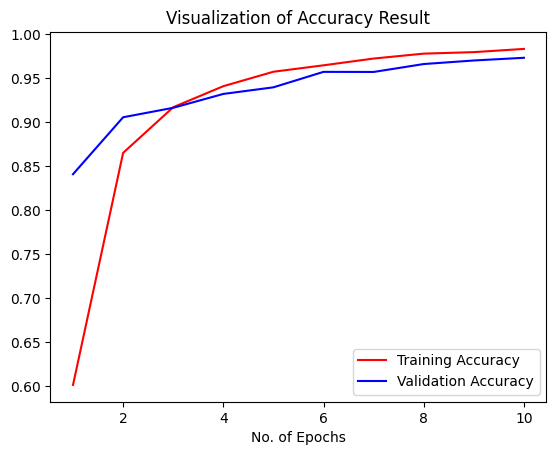

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [55]:
class_name = validation_set.class_names

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 332s 19ms/step


In [58]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [59]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [63]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

Confusion Matrix Visualization

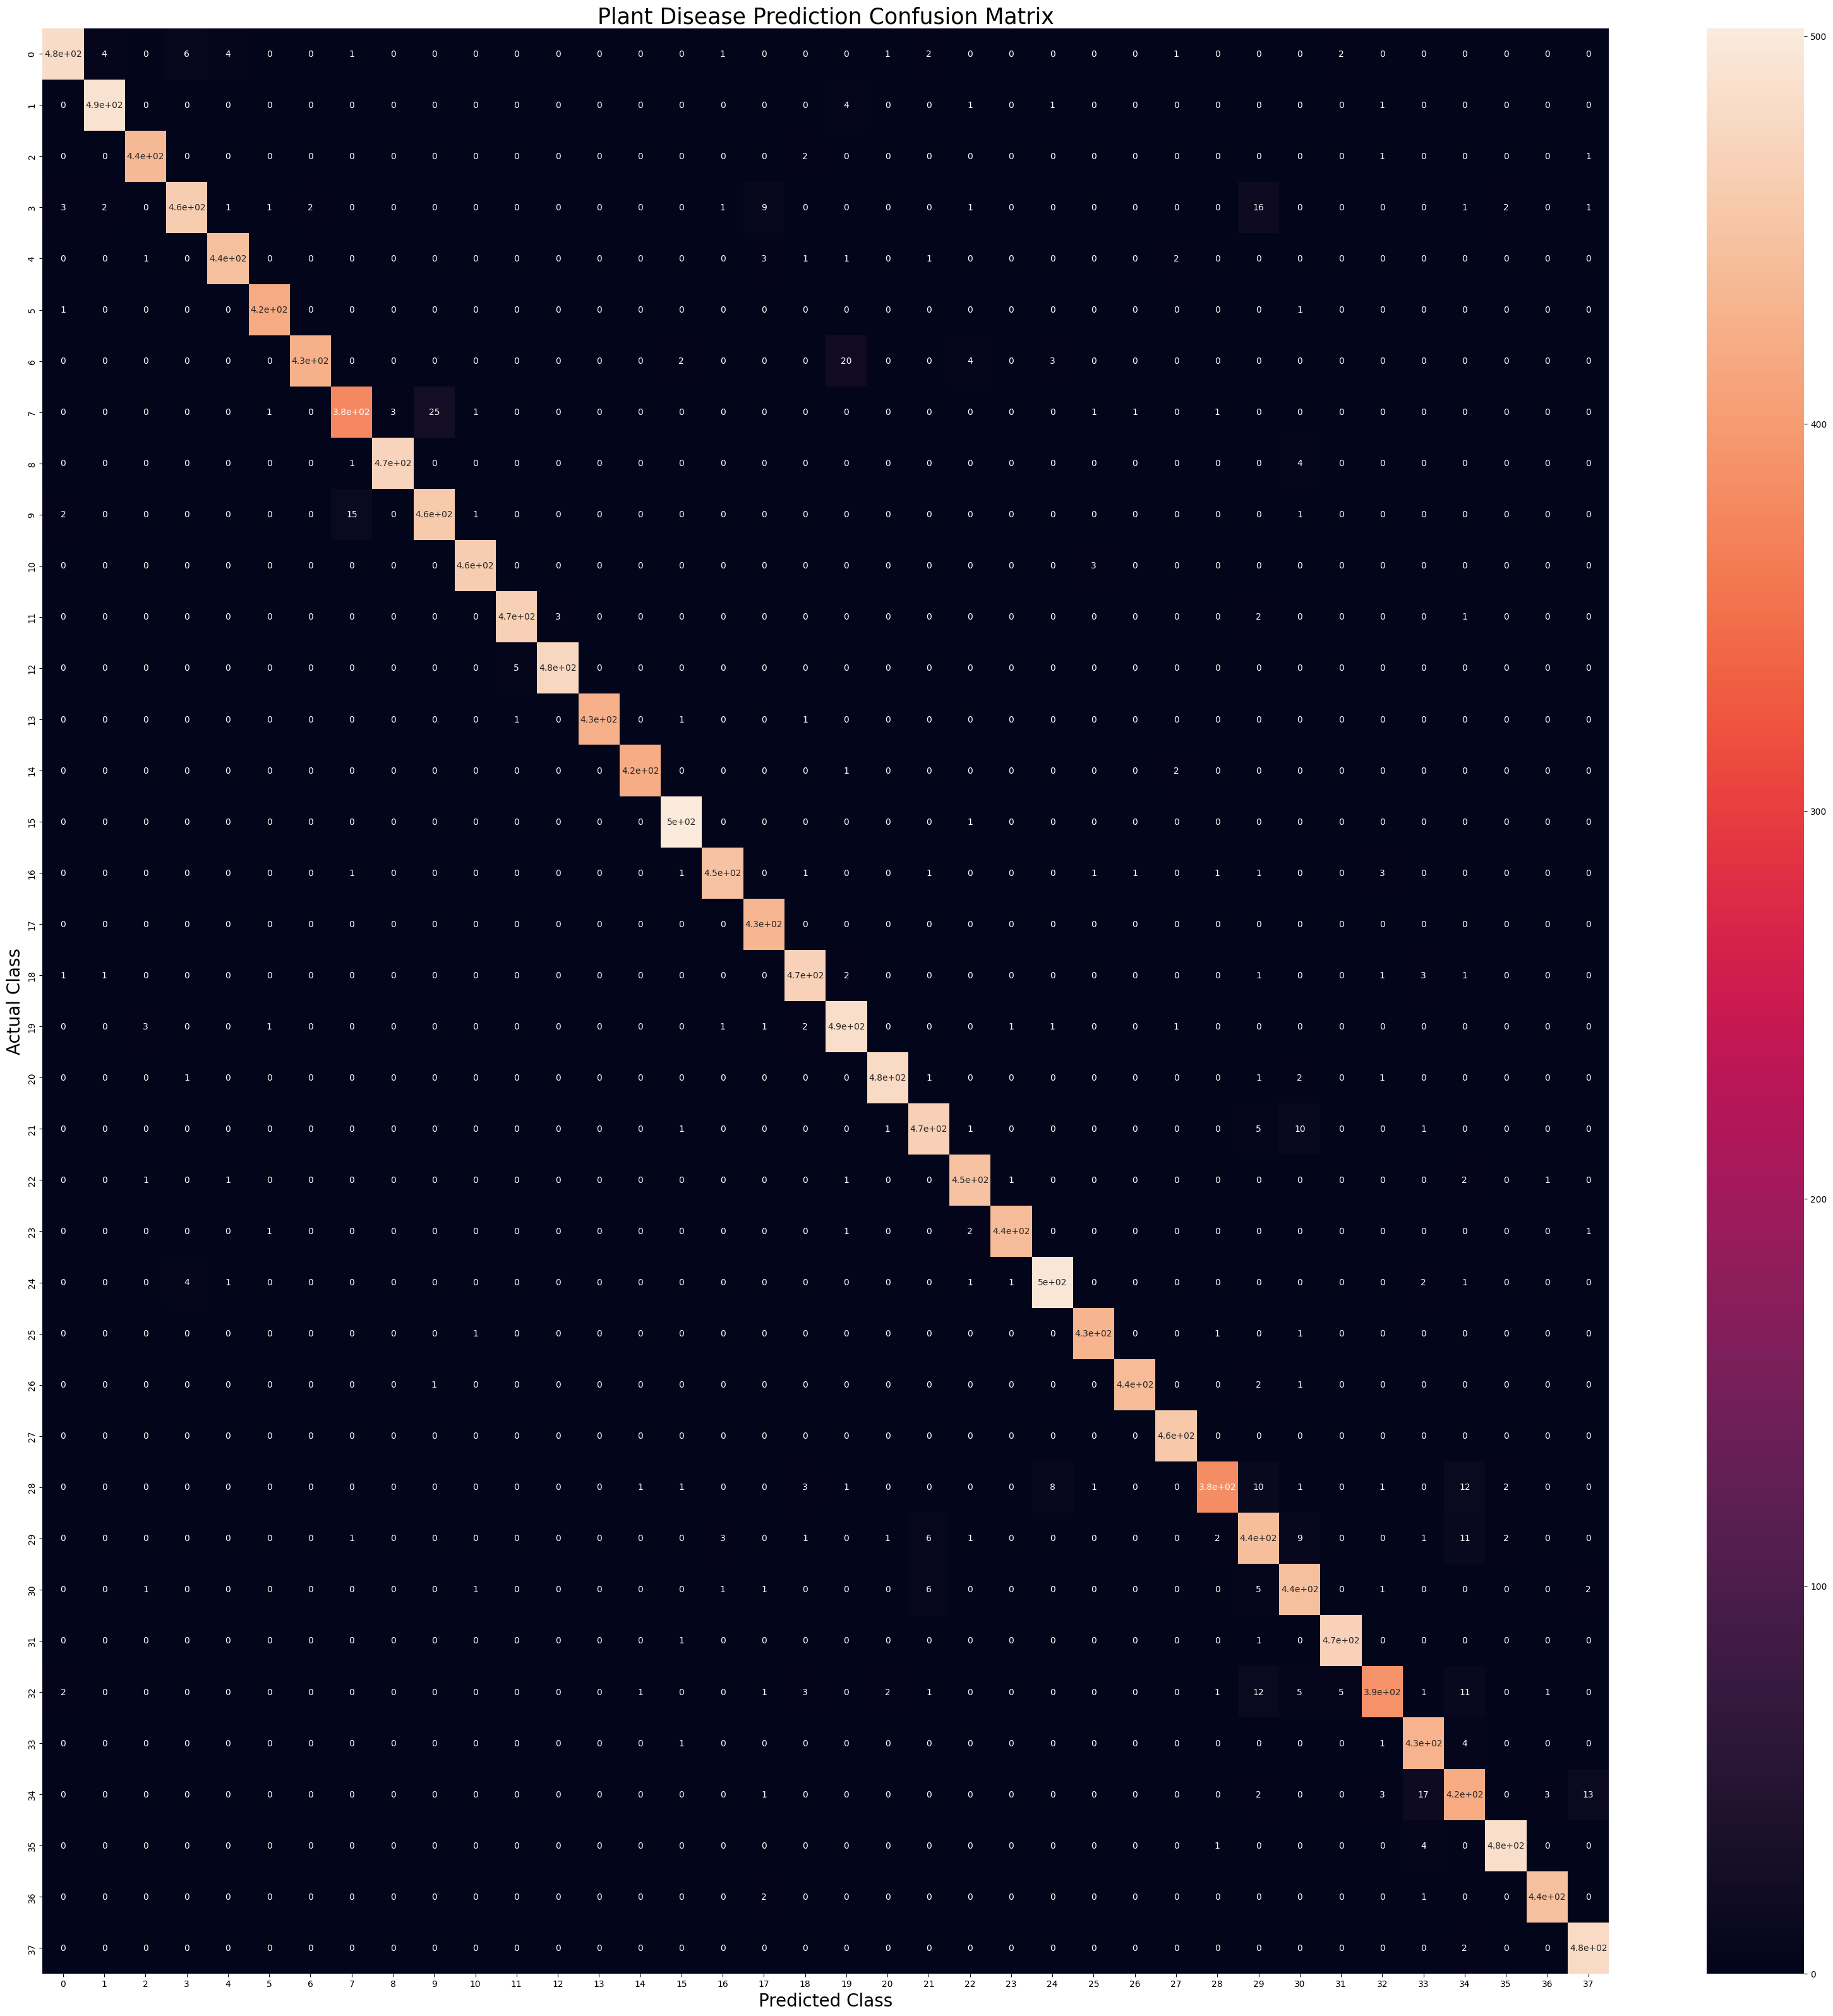

In [64]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()